In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
jobs=pd.read_csv("c:\\Users\\ADMIN\\Downloads\\Telegram Desktop\\jobs_in_data.csv")

In [3]:
jobs

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


<B>Dealing with job_category and job_title

In [4]:
jobs['job_title'].describe()

count              9355
unique              125
top       Data Engineer
freq               2195
Name: job_title, dtype: object

In [5]:
jobs['job_title'].unique()

array(['Data DevOps Engineer', 'Data Architect', 'Data Scientist',
       'Machine Learning Researcher', 'Data Engineer',
       'Machine Learning Engineer', 'Data Analyst', 'Analytics Engineer',
       'Applied Scientist', 'BI Developer',
       'Business Intelligence Engineer', 'Research Scientist',
       'Research Analyst', 'Research Engineer', 'Data Science Engineer',
       'Data Quality Analyst', 'Data Product Manager',
       'Machine Learning Scientist', 'AI Engineer', 'MLOps Engineer',
       'Deep Learning Engineer', 'Data Modeler', 'Data Product Owner',
       'Data Science Consultant', 'Business Intelligence Analyst',
       'AI Developer', 'Data Manager', 'ML Engineer',
       'Data Science Director', 'Head of Data', 'BI Analyst',
       'Data Management Analyst', 'Machine Learning Modeler',
       'Data Specialist', 'BI Data Analyst', 'Data Integration Engineer',
       'Business Intelligence Manager', 'Data Integration Specialist',
       'Data Science Practitioner', 'B

In [6]:
jobs['job_title'].value_counts()#So far we know that most of the titles are Data Engineer

job_title
Data Engineer                     2195
Data Scientist                    1989
Data Analyst                      1388
Machine Learning Engineer          991
Applied Scientist                  272
                                  ... 
Consultant Data Engineer             1
Sales Data Analyst                   1
Managing Director Data Science       1
AWS Data Architect                   1
Deep Learning Researcher             1
Name: count, Length: 125, dtype: int64

In [7]:
temp=jobs['job_title'].value_counts()
temp.tail(14)  #Shows the job titles with least frequency of 1

job_title
Marketing Data Engineer                 1
Data Science Tech Lead                  1
Cloud Data Architect                    1
Manager Data Management                 1
Analytics Engineering Manager           1
Machine Learning Operations Engineer    1
Power BI Developer                      1
BI Data Engineer                        1
Staff Machine Learning Engineer         1
Consultant Data Engineer                1
Sales Data Analyst                      1
Managing Director Data Science          1
AWS Data Architect                      1
Deep Learning Researcher                1
Name: count, dtype: int64

In [8]:
jobs['job_title_count']=jobs['job_title'].apply(lambda X: temp[X])

In [9]:
jobs

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size,job_title_count
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L,2
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M,213
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M,213
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M,1989
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M,1989
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L,40
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L,1989
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L,10
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S,1989


<B>APPLY FUNCTION

In [10]:
# Examples
# Create a series with typical summer temperatures for each city.

# >>> s = pd.Series([20, 21, 12],
# ...               index=['London', 'New York', 'Helsinki'])
# >>> s
# London      20
# New York    21
# Helsinki    12
# dtype: int64

# Square the values by defining a function and passing it as an argument to apply().
# >>> def square(x):
# ...     return x ** 2
# >>> s.apply(square)
# London      400
# New York    441
# Helsinki    144
# dtype: int64

# Square the values by passing an anonymous function as an argument to apply().
# >>> s.apply(lambda x: x ** 2)
# London      400
# New York    441
# Helsinki    144
# dtype: int64

# Define a custom function that needs additional positional arguments and pass these additional arguments using the args keyword.
# >>> def subtract_custom_value(x, custom_value):
# ...     return x - custom_value
# >>> s.apply(subtract_custom_value, args=(5,))
# London      15
# New York    16
# Helsinki     7
# dtype: int64

# Define a custom function that takes keyword arguments and pass these arguments to apply.
# >>> def add_custom_values(x, **kwargs):
# ...     for month in kwargs:
# ...         x += kwargs[month]
# ...     return x
# >>> s.apply(add_custom_values, june=30, july=20, august=25)
# London      95
# New York    96
# Helsinki    87
# dtype: int64

# Use a function from the Numpy library.
# >>> s.apply(np.log)
# London      2.995732
# New York    3.044522
# Helsinki    2.484907
# dtype: float64


In [11]:
for i in range(0,len(jobs)):
    if jobs['job_title_count'][i]==1:
        #jobs['job_title'][i]="Others"
        jobs.loc[i,"job_title"]="Others"

In [12]:
jobs['job_title'].value_counts().tail()

job_title
Data Integration Engineer    2
Machine Learning Modeler     2
Data Management Analyst      2
Data Product Owner           2
Principal Data Analyst       2
Name: count, dtype: int64

In [13]:
jobs['job_category'].describe()#Only 10 categories therefore we dont need combining of sparse classes

count                          9355
unique                           10
top       Data Science and Research
freq                           3014
Name: job_category, dtype: object

In [14]:
jobs['job_category'].value_counts()

job_category
Data Science and Research         3014
Data Engineering                  2260
Data Analysis                     1457
Machine Learning and AI           1428
Leadership and Management          503
BI and Visualization               313
Data Architecture and Modeling     259
Data Management and Strategy        61
Data Quality and Operations         55
Cloud and Database                   5
Name: count, dtype: int64

In [15]:
# freq1=jobs['job_title'].value_counts()==1
# for i in jobs['job_title']:
#    if freq1[i]==True:
#      if i=="Machine Learning Operations Engineer" or i=="Staff Machine Learning Engineer":
#       # i="Other machine learning engineers"

#      elif i=="BI Data Engineer" or i=="Marketing Data Engineer" or i=="Consultant Data Engineer":
#        i="Other data engineers"  

#      elif i=="AWS Data Architect" or i=="Cloud Data Architect":
#        i='Other data architects'  

#      elif i=="Data Science Tech Lead" or i=="Managing Director Data Science":
#        i="Other Data Sciencetists" 

#      elif "Other" not in i:
#        i="Others"
    
#      print(i)
       
    

In [16]:
jobs['job_title'].value_counts()

job_title
Data Engineer                2195
Data Scientist               1989
Data Analyst                 1388
Machine Learning Engineer     991
Applied Scientist             272
                             ... 
Data Integration Engineer       2
Machine Learning Modeler        2
Data Management Analyst         2
Data Product Owner              2
Principal Data Analyst          2
Name: count, Length: 112, dtype: int64

Let's deal with the employee_residence and company_location columns

In [17]:
jobs['company_location'].describe()

count              9355
unique               70
top       United States
freq               8132
Name: company_location, dtype: object

In [18]:
jobs['company_location'].unique()

array(['Germany', 'United States', 'United Kingdom', 'Canada', 'Spain',
       'Ireland', 'South Africa', 'Poland', 'France', 'Netherlands',
       'Luxembourg', 'Lithuania', 'Portugal', 'Gibraltar', 'Australia',
       'Colombia', 'Ukraine', 'Slovenia', 'Romania', 'Greece', 'India',
       'Latvia', 'Mauritius', 'Russia', 'Italy', 'South Korea', 'Estonia',
       'Czech Republic', 'Brazil', 'Qatar', 'Kenya', 'Denmark', 'Ghana',
       'Sweden', 'Turkey', 'Switzerland', 'Andorra', 'Ecuador', 'Mexico',
       'Israel', 'Nigeria', 'Saudi Arabia', 'Argentina', 'Japan',
       'Central African Republic', 'Finland', 'Singapore', 'Croatia',
       'Armenia', 'Bosnia and Herzegovina', 'Pakistan', 'Iran', 'Bahamas',
       'Austria', 'Puerto Rico', 'American Samoa', 'Thailand',
       'Philippines', 'Belgium', 'Egypt', 'Indonesia',
       'United Arab Emirates', 'Malaysia', 'Honduras', 'Algeria', 'Iraq',
       'China', 'New Zealand', 'Moldova', 'Malta'], dtype=object)

In [19]:
jobs['company_location'].value_counts()

company_location
United States     8132
United Kingdom     449
Canada             226
Spain              113
Germany             72
                  ... 
Gibraltar            1
Ecuador              1
Andorra              1
Mauritius            1
Malta                1
Name: count, Length: 70, dtype: int64

In [20]:
#Let's have a good look at these ones with a frequency of 1
temp=jobs['company_location'].value_counts()
temp.tail(22)

company_location
Indonesia                 1
Malaysia                  1
Iraq                      1
Honduras                  1
Algeria                   1
Moldova                   1
New Zealand               1
China                     1
Egypt                     1
Bosnia and Herzegovina    1
Philippines               1
Thailand                  1
American Samoa            1
Bahamas                   1
Iran                      1
Qatar                     1
Armenia                   1
Gibraltar                 1
Ecuador                   1
Andorra                   1
Mauritius                 1
Malta                     1
Name: count, dtype: int64

In [21]:
jobs['company_location_count']=jobs['company_location'].apply(lambda X: temp[X])

In [22]:
for i in range(0,len(jobs)):
    if jobs['job_title_count'][i]==1:
        #jobs['job_title'][i]="Others"
        jobs.loc[i,"job_title"]="Others"

In [23]:
jobs['employee_residence'].describe()

count              9355
unique               83
top       United States
freq               8086
Name: employee_residence, dtype: object

In [24]:
jobs['employee_residence'].unique()

array(['Germany', 'United States', 'United Kingdom', 'Canada', 'Spain',
       'Ireland', 'South Africa', 'Poland', 'France', 'Czech Republic',
       'Netherlands', 'Pakistan', 'Ukraine', 'Lithuania', 'Portugal',
       'Australia', 'Uganda', 'Colombia', 'Italy', 'Slovenia', 'Romania',
       'Greece', 'India', 'Latvia', 'Mauritius', 'Armenia', 'Croatia',
       'Thailand', 'South Korea', 'Estonia', 'Turkey', 'Philippines',
       'Brazil', 'Qatar', 'Russia', 'Kenya', 'Tunisia', 'Ghana',
       'Belgium', 'Switzerland', 'Andorra', 'Ecuador', 'Peru', 'Mexico',
       'Moldova', 'Nigeria', 'Saudi Arabia', 'Argentina', 'Egypt',
       'Uzbekistan', 'Georgia', 'Central African Republic', 'Finland',
       'Austria', 'Singapore', 'Sweden', 'Kuwait', 'Cyprus',
       'Bosnia and Herzegovina', 'Iran', 'American Samoa', 'China',
       'Costa Rica', 'Chile', 'Puerto Rico', 'Denmark', 'Bolivia',
       'Dominican Republic', 'Indonesia', 'United Arab Emirates',
       'Malaysia', 'Japan', 'Hond

In [25]:
jobs['employee_residence'].value_counts()

employee_residence
United States     8086
United Kingdom     442
Canada             224
Spain              117
Germany             66
                  ... 
Andorra              1
Qatar                1
Mauritius            1
Uganda               1
Malta                1
Name: count, Length: 83, dtype: int64

In [26]:
#Let's have a good look at these ones with a frequency of 1
temp=jobs['employee_residence'].value_counts()
temp.tail(28)

employee_residence
Dominican Republic        1
Iraq                      1
Jersey                    1
Algeria                   1
Honduras                  1
Hong Kong                 1
Malaysia                  1
Luxembourg                1
Indonesia                 1
Bulgaria                  1
Serbia                    1
New Zealand               1
Ecuador                   1
Chile                     1
Costa Rica                1
China                     1
American Samoa            1
Iran                      1
Bosnia and Herzegovina    1
Cyprus                    1
Kuwait                    1
Georgia                   1
Peru                      1
Andorra                   1
Qatar                     1
Mauritius                 1
Uganda                    1
Malta                     1
Name: count, dtype: int64

In [27]:
jobs['employee_residence_count']=jobs['employee_residence'].apply(lambda X:temp[X])

for i in range(len(jobs)):
    if jobs['employee_residence_count'][i]== 1:
      jobs.loc[i,"employee_residence"]="Others"
jobs['employee_residence'].value_counts()

employee_residence
United States               8086
United Kingdom               442
Canada                       224
Spain                        117
Germany                       66
France                        54
Others                        28
Portugal                      26
Netherlands                   21
Australia                     21
Italy                         20
Brazil                        19
Greece                        16
Colombia                      16
India                         14
Poland                        11
Nigeria                       11
Argentina                      9
Mexico                         9
Estonia                        9
Ireland                        8
Ukraine                        7
Turkey                         7
Russia                         6
Latvia                         6
Austria                        6
Slovenia                       6
Belgium                        6
Pakistan                       6
Puerto Rico             

In [30]:
jobs.drop(columns=['employee_residence_count',"company_location_count",'job_title_count'],inplace=True)

In [31]:
jobs.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [32]:
#Let's drop the salary and salary_currency columns
jobs.drop(['salary', 'salary_currency'], axis=1, inplace=True)
jobs.head()

,work_year,job_title,job_category,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,93300,United States,Senior,Full-time,In-person,United States,M


**Checking correlation**

In [36]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# plt.figure(figsize=(12,12))
# sns.heatmap(jobs.corr(), annot=True, cmap='Blues')# fmt='g')
# plt.show()

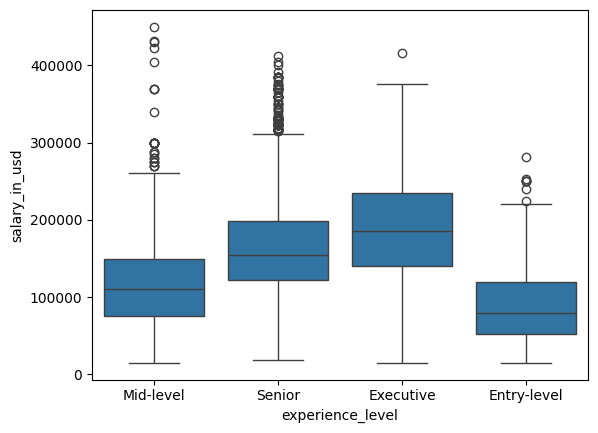

In [39]:
sns.boxplot(data=jobs,x="experience_level",y="salary_in_usd")
plt.show()

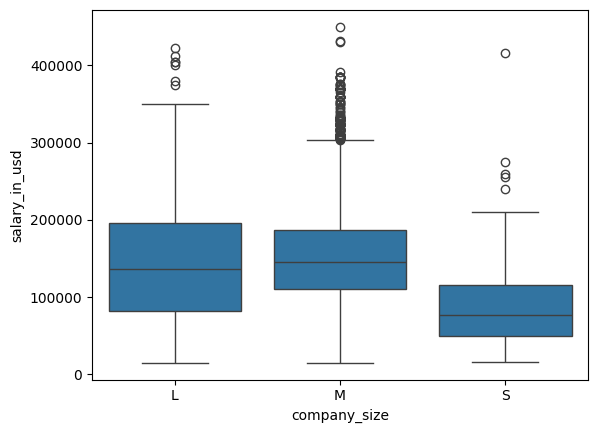

In [40]:
sns.boxplot(data=jobs,x="company_size",y="salary_in_usd")
plt.show()

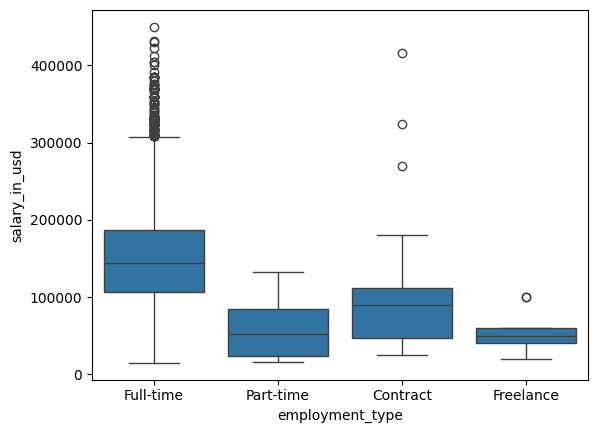

In [41]:
sns.boxplot(data=jobs,x="employment_type",y="salary_in_usd")
plt.show()

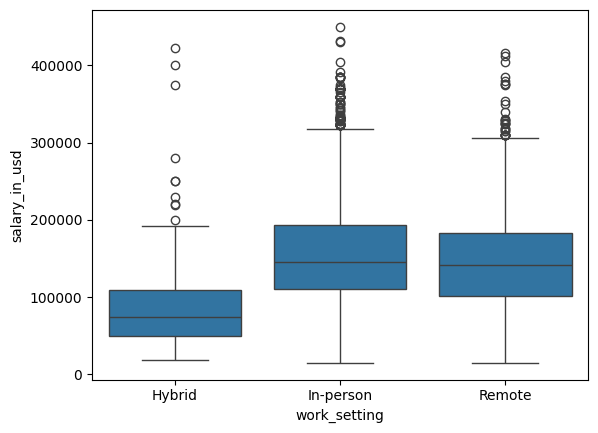

In [42]:
sns.boxplot(data=jobs,x="work_setting",y="salary_in_usd")
plt.show()